### Interpolation Methods in Python

In [12]:
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np

##### Lagrange Form of the Algebraic Interpolating Polynomial

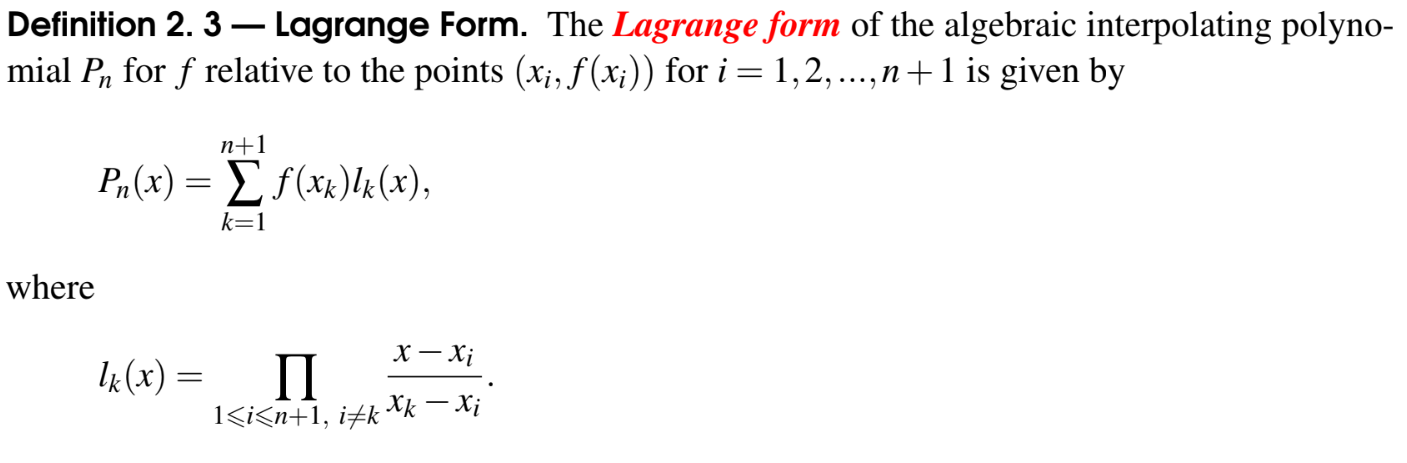

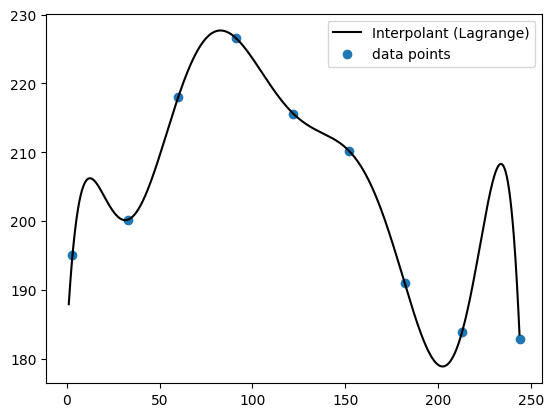

In [9]:
X = [3, 33, 60, 91, 122, 152, 182, 213, 244]
Y = [195, 200.20, 218, 226.6, 215.6, 210.2, 191, 183.9, 182.9]
interval = np.arange(1, 244, step=0.1)

lagrange_poly = lagrange(X, Y)

fig = plt.figure()
plt.plot(interval, lagrange_poly(interval), color='k', label='Interpolant (Lagrange)')
plt.scatter(X, Y, label='data points')
plt.legend()
plt.show()

##### Newton's Divided Difference

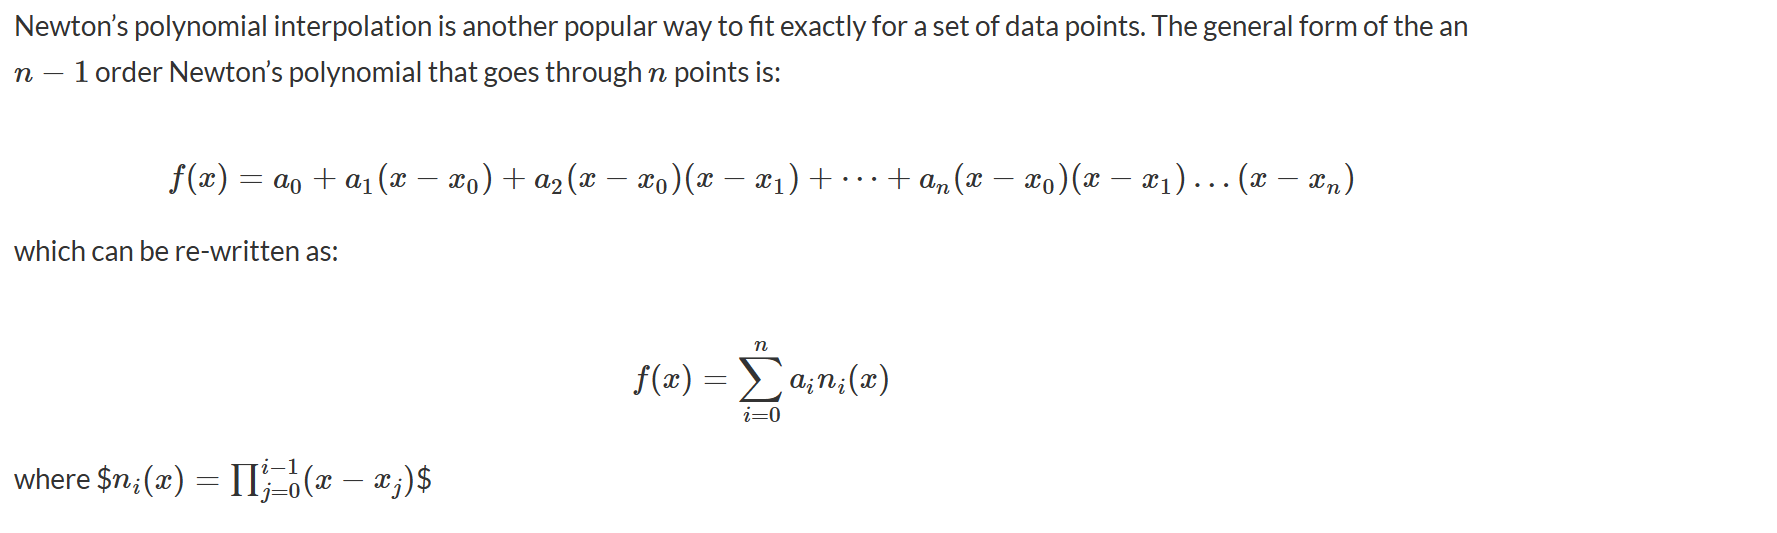

In [ ]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coeff = np.zeros([n, n])
    # the first column is y
    coeff[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coeff[i][j] = \
           (coeff[i+1][j-1] - coeff[i][j-1]) / (x[i+j]-x[i])
            
    return coeff

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

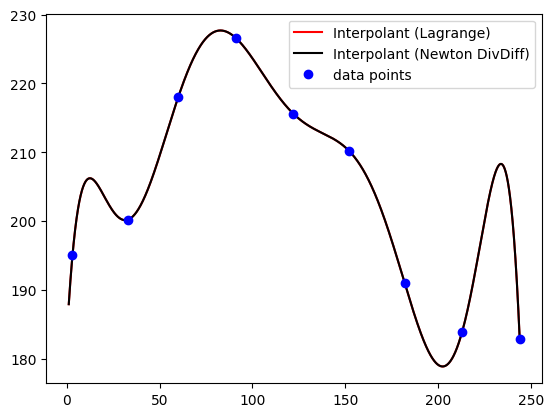

In [ ]:
X = [3, 33, 60, 91, 122, 152, 182, 213, 244]
Y = [195, 200.20, 218, 226.6, 215.6, 210.2, 191, 183.9, 182.9]
interval = np.arange(1, 244, step=0.1)

# solve for NDD coefficients and function
coeff = divided_diff(X, Y)[0,:]
y_new = newton_poly(coeff, X, interval)

plt.figure()
plt.plot(interval, y_new, 'k-', label='Interpolant (Newton DivDiff)')
plt.plot(X, Y, 'bo', label='data points')
plt.legend()
plt.show()